In [1]:
import pandas as pd
# load the dataset
df = pd.read_csv('household_power_consumption.txt', delimiter=';', low_memory=False)
# grab time series of electricity usage
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['electricity_usage'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df[['date_time', 'electricity_usage']].copy()
# set the index as and sort by date and time
df = df.set_index('date_time').sort_index()
# resample to hourly frequency
df_hour = df.resample('1H').mean()
# create shifted time series
df_hour['electricity_usage'] = df_hour['electricity_usage'].fillna(method='ffill')
df_hour['electricity_usage_1hr_lag'] = df_hour['electricity_usage'].shift()
df_hour['electricity_usage_2hr_lag'] = df_hour['electricity_usage'].shift(2)
df_hour['electricity_usage_3hr_lag'] = df_hour['electricity_usage'].shift(3)
df_hour['electricity_usage_4hr_lag'] = df_hour['electricity_usage'].shift(4)
df_hour['electricity_usage_5hr_lag'] = df_hour['electricity_usage'].shift(5)
df_hour['electricity_usage_6hr_lag'] = df_hour['electricity_usage'].shift(6)
df_hour['electricity_usage_7hr_lag'] = df_hour['electricity_usage'].shift(7)
df_hour['electricity_usage_8hr_lag'] = df_hour['electricity_usage'].shift(8)
# create month/seasonality as a feature
df_hour['month'] = df_hour.index.month
# drop missing data
df_hour = df_hour.dropna()
# split train test sets
sample_size = df_hour.shape[0] - 200
df_train = df_hour.iloc[:sample_size].copy()
df_test = df_hour.iloc[sample_size:].copy()

C:\Users\Laptop_Academy\AppData\Local\Temp\ipykernel_14724\2681619798.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
C:\Users\Laptop_Academy\AppData\Local\Temp\ipykernel_14724\2681619798.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hour['electricity_usage'] = df_hour['electricity_usage'].fillna(method='ffill')


In [2]:
df_train.head()


,electricity_usage,electricity_usage_1hr_lag,electricity_usage_2hr_lag,electricity_usage_3hr_lag,electricity_usage_4hr_lag,electricity_usage_5hr_lag,electricity_usage_6hr_lag,electricity_usage_7hr_lag,electricity_usage_8hr_lag,month
date_time,,,,,,,,,,
2006-12-17 01:00:00,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200,4.222889,12
2006-12-17 02:00:00,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,3.632200,12
2006-12-17 03:00:00,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,3.400233,12
2006-12-17 04:00:00,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,3.268567,12
2006-12-17 05:00:00,1.996733,2.215767,1.662200,1.587267,3.349400,1.882467,2.061600,2.200133,3.056467,12


In [4]:
import h2o 
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 12+33, mixed mode, sharing)
  Starting server from C:\Users\Laptop_Academy\AppData\Roaming\Python\Python312\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LAPTOP~1\AppData\Local\Temp\tmpm8kvi77s
  JVM stdout: C:\Users\LAPTOP~1\AppData\Local\Temp\tmpm8kvi77s\h2o_Laptop_Academy_started_from_python.out
  JVM stderr: C:\Users\LAPTOP~1\AppData\Local\Temp\tmpm8kvi77s\h2o_Laptop_Academy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Africa/Cairo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_Laptop_Academy_au0v46
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.971 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [7]:
h2o_frame = h2o.H2OFrame(df_train)
x = h2o_frame.columns
y = 'electricity_usage'
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
h2o_automl = H2OAutoML(sort_metric='mse', max_runtime_secs=5*60, seed=666)
h2o_automl.train(x=x,y=y, training_frame=h2o_frame)

AutoML progress: |
19:48:08.244: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),12/21
# GBM base models (used / total),9/15
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/3
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [9]:
h2o_models = h2o.automl.get_leaderboard(h2o_automl,extra_columns='All')
h2o_models

model_id,mse,rmse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_3_AutoML_1_20241014_194808,0.344404,0.58686,0.39934,0.242901,0.344404,1076,0.060612,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20241014_194808,0.344596,0.587023,0.399878,0.242986,0.344596,635,0.019221,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20241014_194808,0.344648,0.587067,0.399586,0.243024,0.344648,691,0.017295,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20241014_194808,0.344987,0.587356,0.399984,0.243157,0.344987,602,0.024367,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_1_20241014_194808,0.345219,0.587554,0.400721,0.243242,0.345219,620,0.022077,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_1_20241014_194808,0.34679,0.588889,0.402713,0.24391,0.34679,946,0.020424,StackedEnsemble
GBM_1_AutoML_1_20241014_194808,0.347185,0.589224,0.402947,0.244179,0.347185,1707,0.023833,GBM
GBM_2_AutoML_1_20241014_194808,0.348507,0.590345,0.404855,0.244573,0.348507,784,0.011615,GBM
GBM_5_AutoML_1_20241014_194808,0.3501,0.591692,0.406301,0.245783,0.3501,850,0.00953,GBM
GBM_3_AutoML_1_20241014_194808,0.350936,0.592398,0.406145,0.245477,0.350936,506,0.007357,GBM


In [11]:
from h2o.model.regression  import h2o_mean_squared_error
h2o_frame_test = h2o.H2OFrame(df_test)

y_pred = h2o_automl.predict(h2o_frame_test)
y_actual = h2o.H2OFrame(df_test[['electricity_usage']])

h2o_mean_squared_error(y_actual,y_pred)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


0.34838246022580593

C:\Users\Laptop_Academy\AppData\Roaming\Python\Python312\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


<Axes: xlabel='date_time'>

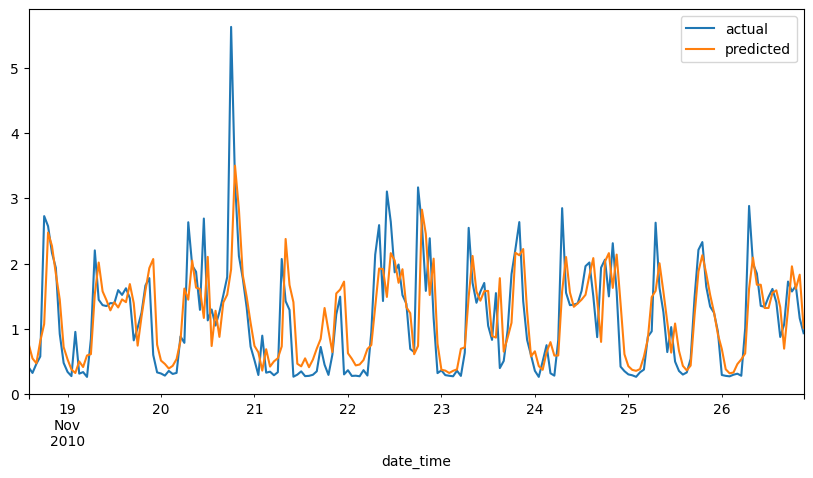

In [16]:
h2o_compare = pd.DataFrame(data={'actual': df_test['electricity_usage'], 'predicted': y_pred.as_data_frame().to_numpy().ravel()})
h2o_compare.plot(figsize=(10, 5))